In [1]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_proteinas=ldata("data/yeast_AP-MS.txt")
red_binarias=ldata("data/yeast_Y2H.txt")
red_literatura=ldata("data/yeast_LIT.txt")
red_prueba=ldata("data/prueba.txt")


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


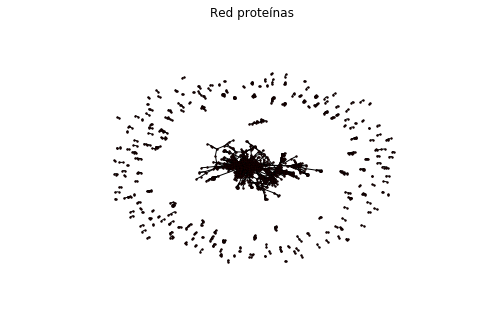

1622

In [3]:
G = nx.Graph()#directed
G.add_edges_from(red_proteinas)
nx.draw(G, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red proteínas")
plt.show()
G.number_of_nodes()


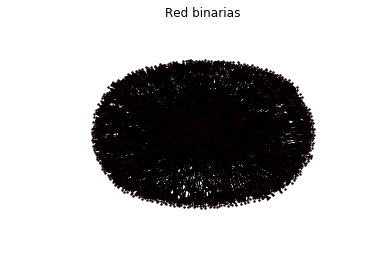

2018

In [54]:
G1 = nx.DiGraph()#directed
G1.add_edges_from(red_binarias)
nx.draw(G1, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red binarias")
plt.show()
G1.number_of_nodes()

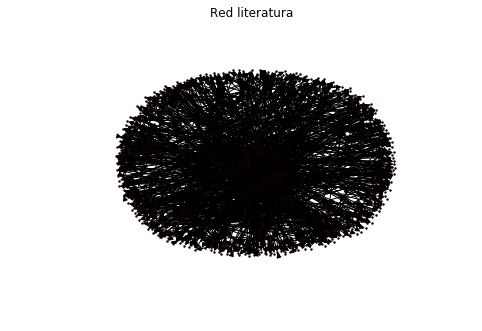

1536

In [55]:
G2 = nx.DiGraph()#directed
G2.add_edges_from(red_literatura)
nx.draw(G2, with_labels=False, font_weight='bold',node_size=2)
plt.title("Red literatura")
plt.show()
G2.number_of_nodes()

In [6]:
G1.number_of_nodes()

2018

In [7]:
G.number_of_edges()


9070

In [8]:
G1.number_of_edges()

2930

In [9]:
G2.number_of_edges()

2925

In [6]:
# for j in red_literatura:

#     if "YER148W" in j and "YGR274C" in j:
#         print(j)
# print(red_literatura[0])
# k=np.transpose(red_literatura[0])
# k
red_literatura_trans=[]
for j in red_literatura:
    red_literatura_trans.append([j[1],j[0]])
a_red_literatura=0
for j in red_literatura_trans:
    for i in red_literatura:
        if i==j:
            a_red_literatura+=1
print(a_red_literatura)


81


In [7]:
red_prueba_trans=[]
for j in red_prueba:
    red_prueba_trans.append([j[1],j[0]])
a_red_prueba=0
for j in red_prueba_trans:
    for i in red_prueba:
        if i==j:
            a_red_prueba+=1
print(a_red_prueba)


6


In [21]:
H.number_of_nodes()


4

In [8]:
red_proteinas_trans=[]
for j in red_proteinas:
    red_proteinas_trans.append([j[1],j[0]])
a_red_proteinas=0
for j in red_proteinas_trans:
    for i in red_proteinas:
        if i==j:
            a_red_proteinas+=1
print(a_red_proteinas)

0


In [9]:
red_binarias_trans=[]
for j in red_binarias:
    red_binarias_trans.append([j[1],j[0]])
a_red_binarias=0
for j in red_binarias_trans:
    for i in red_binarias:
        if i==j:
            a_red_binarias+=1
print(a_red_binarias)

225


In [10]:
red_prueba_trans=[]
for j in red_prueba:
    red_prueba_trans.append([j[1],j[0]])
a_red_prueba=0
for j in red_prueba_trans:
    for i in red_prueba:
        if i==j:
            a_red_prueba+=1
print(a_red_prueba)

6


In [16]:
H=nx.DiGraph()
H.add_edges_from(red_prueba)

print([H.in_degree("a"),H.out_degree("a")])



[2, 2]


In [15]:
H=nx.DiGraph()
H.add_edges_from(red_prueba)
km=0
for k in H:
    km+=H.in_degree(k)/H.number_of_nodes()
print (km)
H
Km=sum(H.in_degree(k) for k in H)/H.number_of_nodes()
print(Km)



1.5
1.5


In [17]:
def K(H,a_R):
    if a_R >0:
        k_in=sum(H.in_degree(k) for k in H)/H.number_of_nodes()
        k_out=sum(H.out_degree(k) for k in H)/H.number_of_nodes()
        salida=[k_in,k_out]
    else:
        k=sum(H.degree(k) for k in H)/H.number_of_nodes()
        salida=[k]
    return salida

K(G,a_red_proteinas)
K(G1,a_red_binarias)
K(G2,a_red_literatura)


def Min(H,a_R):
    if a_R >0:
        M=min(H.in_degree(k) for k in H )
        Mbis=min(H.out_degree(k) for k in H )
        MINIMO=[M,Mbis]
        
    else:
        Mini=min(H.degree(k) for k in H)
        MINIMO=[Mini]
    return MINIMO

def Max(H, a_R):
    if a_R >0:
        Ma=max(H.in_degree(k) for k in H)
        Mabis=max(H.out_degree(k) for k in H)
        MAXIMO=[Ma, Mabis]
    else:
        Maxi=max(H.degree(k) for k in H)
        MAXIMO=[Maxi]
    return MAXIMO




In [18]:
def Den(H,a_R):
    if a_R>0:
        d=H.number_of_edges()/(H.number_of_nodes()*(H.number_of_nodes()-1)) #2 veces el numero posible de enlaces por ser dirigida
        dens=[d]
    else:
        d2=2* H.number_of_edges()/(H.number_of_nodes()*(H.number_of_nodes()-1))
        dens=[d2]
    return dens
Den(G, a_red_proteinas)

[0.006899274397150227]

In [58]:
data = pd.DataFrame({"Red":["Proteinas","Binarias","Literatura"],"Nodos":[G.number_of_nodes(),G1.number_of_nodes(),G2.number_of_nodes()],
                     "Enlaces":[G.number_of_edges(),G1.number_of_edges(),G2.number_of_edges()],
                     "Dirigida":["No","Sí","Sí"],"Grado medio ([in, out])":[K(G,a_red_proteinas),K(G1,a_red_binarias),K(G2,a_red_literatura)],"Grado máximo([in,out])":[Max(G,a_red_proteinas),Max(G1,a_red_binarias),Max(G2,a_red_literatura)],"Grado mínimo([in,out])":[Min(G,a_red_proteinas),Min(G1,a_red_binarias),Min(G2,a_red_literatura)],"Densidad": [Den(G,a_red_proteinas),Den(G1,a_red_binarias),Den(G2,a_red_literatura)], "Clustering local":[nx.average_clustering(G),nx.average_clustering(H1),nx.average_clustering(H2)], "Clustering global":[nx.transitivity(G),nx.transitivity(G1),nx.transitivity(G2)],"Diámetro":[Diam(G),Diam(H1),Diam(H2)] })
data

,Clustering global,Clustering local,Densidad,Dirigida,Diámetro,Enlaces,"Grado medio ([in, out])","Grado máximo([in,out])","Grado mínimo([in,out])",Nodos,Red
0,0.618590,0.554636,[0.006899274397150227],No,15,9070,[11.183723797780518],[127],[1],1622,Proteinas
1,0.014888,0.046194,[0.0007198475986817699],Sí,14,2930,"[1.4519326065411298, 1.4519326065411298]","[66, 38]","[0, 0]",2018,Binarias
2,0.160304,0.292492,[0.001240584283387622],Sí,19,2925,"[1.904296875, 1.904296875]","[23, 35]","[0, 0]",1536,Literatura


In [56]:
H1=nx.to_undirected(G1)
H2=nx.to_undirected(G2)
def Diam (H):
    
    Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)
    pos = nx.layout.spring_layout(H)
    G0 = Gcc[0]
    nx.draw_networkx_edges(G0, pos, with_labels=False, edge_color='r', width=6.0)
    # show other connected components

#plt.show()
    return nx.diameter(G0)

print([Diam(G), Diam(H1), Diam(H2)])



[15, 14, 19]
